In [230]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [231]:
raw_data = pd.read_csv('epi_r.csv')

In [232]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [233]:
# Convert our label ('rating') from regression to a binary classifier using the mean value
# if rating is > mean then 1 else 0

rating_mean = raw_data.rating.mean()

raw_data.loc[raw_data.rating >= rating_mean, 'rating'] = 1
raw_data.loc[raw_data.rating > 1, 'rating'] = 0

In [234]:
# Drop the title column as it is a text data and does not contribute as a feature or label

raw_data.drop(['title'], axis=1, inplace=True)

In [235]:
# Fill any NaN values to zeros

raw_data.fillna(0, inplace=True)

In [236]:
# Create our feature set and label data

X = raw_data.drop(['rating'], axis=1)
y = raw_data['rating']

In [237]:
from sklearn.model_selection import train_test_split

# test_size: The split between test and train is 80-20 approximately

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7.0, random_state=0)

In [238]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [239]:
from sklearn.decomposition import PCA

# Fit our scaled data into PCA with 30 components
pca = PCA(n_components=30)

pca.fit(X_train)
X_train_pca = pca.fit_transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_train_pca.shape)

original shape:    (17187, 678)
transformed shape: (17187, 30)


In [240]:
print(X_train_pca)

[[ 2.1945674  -0.42732867 -2.11578314 ...  0.66244516  0.80556531
   0.73457622]
 [ 2.28290646 -1.41003348 -1.13286437 ...  0.48887203  0.10973098
   0.51296266]
 [ 1.75108699 -2.328408   -0.80713441 ...  0.95167724 -0.56581652
   1.16634764]
 ...
 [-2.67274709  4.20289909 -3.44881033 ... -0.05042623 -0.01623612
   0.73932317]
 [-2.4497152  -1.37465641  0.34731972 ...  1.4490681   0.95062773
   2.57781758]
 [-3.84250793 -0.98541241  1.07095482 ...  0.03764911 -0.43762063
   0.17273934]]


array([0.08107704, 0.08714022, 0.05693788, 0.0493189 , 0.09550854])

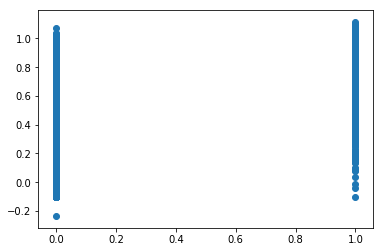

In [241]:
from sklearn.svm import SVR
svr = SVR(gamma='auto')

svr.fit(X_train_pca, y_train)

predicted_labels = svr.predict(X_train_pca)
plt.scatter(y_train, predicted_labels)

svr.score(X_train_pca, y_train)

from sklearn.model_selection import cross_val_score
cross_val_score(svr, X_train_pca, y_train, cv=5)

#pd.Series(predicted_labels).value_counts()

In [242]:
predicted_labels

array([0.96077563, 0.9525269 , 0.90022066, ..., 0.89987177, 0.89970606,
       0.96376503])